# Exercise 3.1

Consider the [Yale face dataset](https://vismod.media.mit.edu/vismod/classes/mas622-00/datasets). Apply a dimension reduction with PCA. Verify that it is possible to recognise individuals on the principal plane.

## Preamble

In [ ]:
import os               # operating system interaction
from PIL import Image   # load images

import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

## Load data

Download the Yale normalized dateset.

In [ ]:
# download the dataset tarball
!wget -O yalefaces.tar.gz \
    https://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/YALE/yalefaces.tar.gz

# create directory and extract
!mkdir -p ./yale_faces
!tar -xvzf yalefaces.tar.gz -C ./yale_faces

--2025-07-18 15:43:26--  https://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/YALE/yalefaces.tar.gz
Resolving vismod.media.mit.edu (vismod.media.mit.edu)... 18.27.72.36
Connecting to vismod.media.mit.edu (vismod.media.mit.edu)|18.27.72.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027795 (5.7M) [application/x-gzip]
Saving to: ‘yalefaces.tar.gz’

yalefaces.tar.gz    100%[===================>]   5.75M  22.9MB/s    in 0.3s    

2025-07-18 15:43:26 (22.9 MB/s) - ‘yalefaces.tar.gz’ saved [6027795/6027795]

./
./yalefaces/
./yalefaces/subject01.centerlight
./yalefaces/subject01.glasses
./yalefaces/subject01.happy
./yalefaces/subject01.leftlight
./yalefaces/subject01.noglasses
./yalefaces/subject01.normal
./yalefaces/subject01.rightlight
./yalefaces/subject01.sad
./yalefaces/subject01.sleepy
./yalefaces/subject01.surprised
./yalefaces/subject01.wink
./yalefaces/subject02.centerlight
./yalefaces/subject02.glasses
./yalefaces/subject02.happy
./yalefaces

Turn each image file into one long numerical vector and associate it with a subject id.

In [ ]:
folder = "./yale_faces/yalefaces"
images, labels = [], []

for filename in sorted(os.listdir(folder)):         # sort for reproducibility
  #if filename.lower().endswith(('.pgm','.gif')):    # check for image extensions
    # read image file and convert to greyscale
    img = Image.open(os.path.join(folder, filename)).convert('L')
    # flatten to 1D array of floats
    images.append(
        np.asarray(img, dtype=float).ravel() )
    # extract person ID from filename, e.g. 'subject01.smile.pgm' -> '01'
    labels.append(
        int(filename.split('subject')[1].split('.')[0]) )

X = np.stack(images)    # shape : (n_samples, n_pixels)
y = np.array(labels)

In [ ]:
display(X.shape,
        y.shape)

(165, 77760)

(165,)

## Execution

Center the data.

In [ ]:
mean_face  = X.mean(axis=0)   # the average of each pixel over all faces
X_centered = X - mean_face

Compute PCA.

In [ ]:
# compute eigenvectors associated to the two largest eigenvalues
pca = PCA(n_components=2)
# compute components and project data into the 2D plane
principal_components = pca.fit_transform(X_centered)    # shape : (n,2)

## Visualization

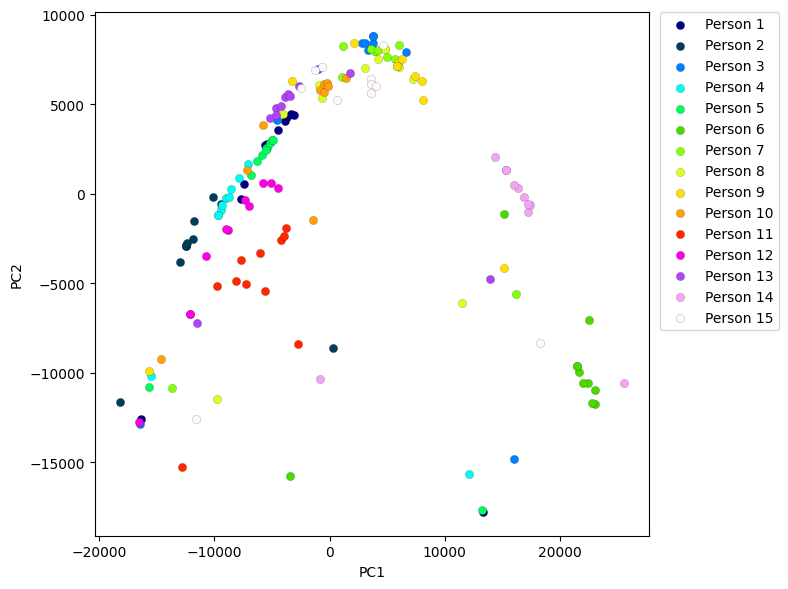

In [ ]:
plt.figure(figsize=(8,6))

labels = np.unique(y)
cmap   = plt.get_cmap('gist_ncar')
colors = cmap(np.linspace(0, 1, len(labels)))

for lab, col in zip(labels, colors):
  mask = (y == lab)
  plt.scatter(
    principal_components[mask, 0],
    principal_components[mask, 1],
    c = [col],           # pass a single color per group
    label = f'Person {lab}',
    #alpha    = 0.7,
    edgecolor = 'k',
    linewidth = 0.1
  )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(
  bbox_to_anchor = (1.02, 1),    # x‐offset just outside the axes, y at top
  loc = 'upper left',            # anchor the legend’s upper‑left corner
  borderaxespad = 0.             # no padding from the axes box
)

plt.tight_layout()
plt.show()

We can clearly see some clusters that represent the same face.